# Lecture 5: Modeling Data

## This week:

- no problem set, one integrated lab, due at the usual problem set time (monday)

- covering mostly conceptual material, which will serve as the basis of understanding the stuff we do later.

## Things we do with data.

1. describe, summarize, visualize

2. infer latent structure, rules, properties, parameters

3. generalize to predict, interpolate, extrapolate

Classical statistics is mostly about #2.  Machine learning is mostly about #3.  Computational Social Science uses tools and models from both.

Both of these rely on fitting models to the data, but the design of the models, and model evaluation differ. 

## What is a model?

A model *assumes* some **structure** of the data, and has some **parameters** that are *fit* to the data.  The end result is an object that may be used in various ways for data summarization, inference, and prediction.

**Examples**: Linear regression, logistic regression, decision tree, neural networks of various architectures, support vector machine, etc. 

The structural assumptions constrain what kind of relationships can be captured by the model, but are also necessary to generalize beyond the data.

**Even when we simply describe or summarize data, we implicitly have a model in mind.**

I have the following data describing the flips of a coin ***how should I summarize them?***

In [1]:
data = ['H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'T']

print(data)

['H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'T']


In [2]:
p = data.count('H')/len(data) # probability of heads 
print(p)
# if we think the coin might be bent.

0.3076923076923077


In [3]:
# coin generated by a process that may be 
# likely to repeat previous outcome

transitions = []

prev = None
for outcome in data:
    if prev:
        if prev == outcome:
            transitions.append('same')
        else:
            transitions.append('different')
    prev = outcome

print(transitions)

['same', 'different', 'same', 'same', 'same', 'same', 'same', 'different', 'same', 'different', 'same', 'same']


In [4]:
p_same = transitions.count('same')/len(transitions)
print(p_same)

0.75


In [5]:
# spin a spinner.  if spinner lands in red then we stop flipping coin.
# if spinner lands on green, then we flip one more time.
len(data)

13

## Model parts.

**Structure:** These are the core assumptions of the model.  Whatever you do in the fitting process, these are not going to change, they are set in stone.  

e.g., in linear regression:  $\hat y = a x + b$

e.g., not $\hat y = a x^2 + b$

**Parameters:** These are the moving parts of the model that are fit to the data.

e.g., in linear regression: $a$ and $b$

**Loss / objective / goodness of fit function:** This is a function that can consider the model and its parameters, and the observed data, and returns a number indicating how well/badly the model fits.  How do I decide whether one value of the parameters is better or worse than another?

e.g., in linear regression: this could be mean squared error, or the likelihood under a normal probability distribution, or the posterior probability of a particular set of parameters, or the mean absolute error, or the quantile error, or... etc.

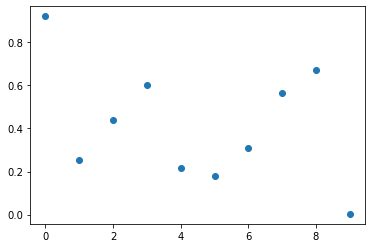

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.random.rand(10)

plt.scatter(x,y)

In [7]:
np.polyfit(x,y,1)

array([-0.03394449,  0.56898778])

In [8]:
predicted_y = np.random.rand(10)

(predicted_y - y)

array([-0.59263214,  0.51188327, -0.35662343, -0.03143244,  0.27015073,
        0.28486807, -0.01646497, -0.03619693, -0.44504958,  0.85778899])

**Optimization algorithm:** how do I find the *best fitting* (loss minimizing, objective maximizing, goodness of fit maximizing) values of the parameters?

e.g., in linear regression, there are various linear algebra tricks available to do so robustly (out of scope here).  

## Model structures and parameters

There are *many*.  We will spend the bulk of class talking about the varieties of model structures that are out there, what they assume, and what they are good at.

## Loss functions

There are relatively few, for common problem types.  We will learn the basics of these because they are essential to understanding what models are doing.  

### Loss for Regression

Regression: predict some number from other data.  

Let's say we want to predict weight.  How do we evaluate how well we have done this?

In [9]:
weight = np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 165, 175, 100, 128])

In [10]:
# our loss function is a single number that 
# tells us how bad our predictions are.



**Errors**

1. Ratio error.

In [11]:
np.log(weight/predicted_weight)



array([ 0.        , -0.03077166,  0.        ,  0.87546874,  0.01550419])

2. Linear error

In [12]:
predicted_weight - weight

array([   0,    5,    0, -140,   -2])

**Summarizing errors**

Mean of the squared errors.

In [13]:
errors = predicted_weight - weight
errors

array([   0,    5,    0, -140,   -2])

In [14]:
# squared errors
errors**2

array([    0,    25,     0, 19600,     4])

In [15]:
(errors**2).sum()

19629

#### Sum squared error


In [16]:
def sse(predicted_y,y):
    return ((predicted_y - y)**2).sum()


In [17]:
sse(predicted_weight, weight)

19629

In [18]:
weight = np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 165, 175, 100, 128])

sse(predicted_weight, weight)

19629

In [19]:
weight = np.array([180, 160, 175, 240, 130, 180])

predicted_weight = np.array([180, 165, 175, 100, 128, 175])

# they increase with number of data points.  
# because we sum all data point errors squared.
sse(predicted_weight, weight)

19654

In [20]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 175, 100, 130])

sse(predicted_weight, weight)

# sum of squared errors dominated by large errors.

19600

**Mean squared errors**

In [21]:
def mse(predicted_y,y):
    return ((predicted_y - y)**2).mean()

In [22]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 175, 100, 130])

mse(predicted_weight, weight)

3920.0

Aside: standard error of the mean.

In [23]:
weight

array([180, 160, 175, 240, 130])

In [24]:
weight.mean()

177.0

In [25]:
weight.std()/(len(weight)**(1/2))

16.099689437998485

In [26]:
[177 - 2*16, 177 + 2*16]

[145, 209]

Simple model:

$\hat y = m$

In [27]:
# parameter / prediction
m = weight.mean()

# error
print(weight - m)
# squared error
print((weight - m)**2)
# sum of squared error
print(sum((weight - m)**2))
# mean of squared error
print(sum((weight - m)**2) / (len(weight)))

[  3. -17.  -2.  63. -47.]
[   9.  289.    4. 3969. 2209.]
6480.0
1296.0


In [28]:
m = weight.mean()
n = len(weight)
sum((weight - m)**2) / (n)

1296.0

**Loss function:** is some function of the prediction, and the actual data, that returns one number, which is bigger when our predictions are worse.

**Mean squared error**

**Mean absolute error**

**not exactly right proportion**

In [29]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 175, 100, 130])

mse(predicted_weight, weight)

3920.0

In [30]:
def mae(predicted_y,y):
    return (np.abs(predicted_y - y)).mean()

In [31]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 175, 100, 130])

mae(predicted_weight, weight)

28.0

In [32]:
def mean_error(predicted_y,y):
    return (predicted_y - y).mean()

In [33]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([280, 60, 275, 140, 130])

mean_error(predicted_weight, weight)

0.0

In [34]:
def not_exactly_right_proportion(predicted_y, y):
    return (predicted_y != y).mean()

In [35]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 185, 100, 130])

not_exactly_right_proportion(predicted_weight, weight)

0.4

### Loss for Classification

Classification: predict a label, (in contrast to a number)

Let's say we want to predict sex (male/female).  How do we evaluate how well we have done this?

In [36]:
# binary predictions loss functions:

y = ['m', 'f', 'm', 'f', 'm']

predicted_y =  ['m', 'm', 'f', 'f', 'm']

In [37]:
def inaccuracy(predicted_y, y):
    return (predicted_y != y).mean()

In [38]:
y = ['m', 'f', 'm', 'f', 'm']

predicted_y =  [0.9, 0.2, 0.7, 0.5, 0.3]

Developing new loss functions is where a lot of the action is for state of the art machine learning, because this is where we specify what it means for a machine to achieve certain intelligent goals.  This is particularly important for RL, and other domains where we don't actually know what we mean by "intelligent behavior".

## Optimization algorithm

There are many. Very active area of research, we will generally not cover them in great detail.  Let's cover some basics though.

In [39]:
# goal: predict weight from height

# model is: predicted_y = slope * x + intercept

# parameters are: slope, intercept

# loss function:  mean absolute error

import pandas as pd

hw = pd.read_csv('height-weight.csv')

hw = hw[hw['height']>36]

hw

,height,weight
0,67.75,154.25
1,72.25,173.25
2,66.25,154.00
3,72.25,184.75
4,71.25,184.25
...,...,...
247,67.00,134.25
248,69.75,201.00
249,66.00,186.75
250,70.50,190.75


In [40]:
def predict(slope, intercept, x):
    return slope * x + intercept

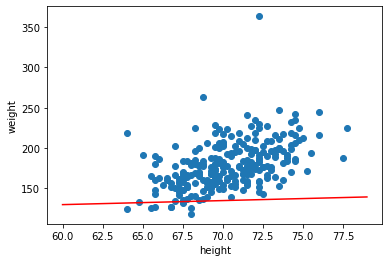

In [41]:
slope = 0.5
intercept = 100

plt.scatter(hw['height'], hw['weight'])
plt.xlabel('height')
plt.ylabel('weight')

x = np.arange(60, 80)
plt.plot(x, predict(slope, intercept, x), 'r-')

In [42]:
def mae(predicted_y, y):
    return np.abs(predicted_y - y).mean()

In [43]:
mae(predict(3, -30, hw['height']), hw['weight'])

20.21573705179283

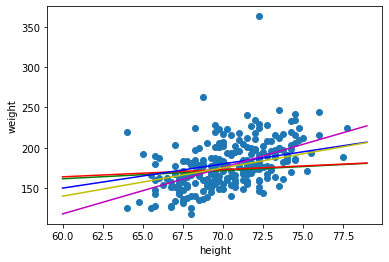

In [44]:
slope = 0.5
intercept = 100

plt.scatter(hw['height'], hw['weight'])
plt.xlabel('height')
plt.ylabel('weight')

x = np.arange(60, 80)
plt.plot(x, predict(1.01, 101, x), 'g-')
plt.plot(x, predict(0.9, 110, x), 'r-')
plt.plot(x, predict(3, -30, x), 'b-')
plt.plot(x, predict(5.75, -227, x), 'm-')
plt.plot(x, predict(3.5, -70, x), 'y-')

### Grid search

Consider a bunch of possible parameter settings.  Evaluate loss for each.  Pick the best one.

In [45]:
current_lowest = 1000000000

best_slope = None
best_intercept = None

for slope in np.linspace(0, 10, num = 100):
    for intercept in np.linspace(-500, 500, num = 100):
        current_mae = mae(predict(slope, 
                                  intercept, 
                                  hw['height']), 
                          hw['weight'])
        if current_mae < current_lowest:
            current_lowest = current_mae
            best_slope = slope
            best_intercept = intercept
        #print(f'{slope=}, {intercept=}, {current_mae=}')

print(current_lowest, best_slope, best_intercept)



18.837854642037907 5.757575757575758 -227.2727272727273


In [46]:
np.linspace(0, 5, num = 100)

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

### Random search

Start with some parameter values.  Propose a local perturbation.  If it is better, adopt that one, and continue.  Until some criterion is reached.

In [47]:
slope = 0
intercept = 0
current = mae(predict(slope, intercept, hw['height']), hw['weight'])

attempts = 0

while attempts < 100:
    new_slope = slope + (np.random.rand()-0.5)
    new_intercept = intercept + (np.random.rand()-0.5)*20
    
    new_mae = mae(predict(new_slope, 
                          new_intercept, 
                          hw['height']), 
                  hw['weight'])
    print(f'{current=} {new_mae=}')
    attempts += 1
    if new_mae < current:
        slope = new_slope
        intercept = new_intercept
        current = new_mae
        attempts = 0
        print(f'{slope=} {intercept=} {current=}')

current=178.82051792828688 new_mae=182.97266903709712
current=178.82051792828688 new_mae=160.19961015717132
slope=0.2887589882853926 intercept=-1.6819552777314195 current=160.19961015717132
current=160.19961015717132 new_mae=188.65034049784987
current=160.19961015717132 new_mae=193.28951500968884
current=160.19961015717132 new_mae=183.83818969313162
current=160.19961015717132 new_mae=180.43153382511235
current=160.19961015717132 new_mae=173.36699951096304
current=160.19961015717132 new_mae=181.63618664601
current=160.19961015717132 new_mae=186.50019636284966
current=160.19961015717132 new_mae=124.199625237965
slope=0.7618935289473169 intercept=1.0515819378825841 current=124.199625237965
current=124.199625237965 new_mae=134.02233400505477
current=124.199625237965 new_mae=107.85652439076947
slope=0.9467657562369135 intercept=4.3961765412263265 current=107.85652439076947
current=107.85652439076947 new_mae=136.45456120737518
current=107.85652439076947 new_mae=145.88776954152314
current=107


current=19.860035470026986 new_mae=20.126782524298015
current=19.860035470026986 new_mae=37.68868400124643
current=19.860035470026986 new_mae=20.099249146839174
current=19.860035470026986 new_mae=21.32952029286403
current=19.860035470026986 new_mae=21.632450655014857
current=19.860035470026986 new_mae=19.935211666815754
current=19.860035470026986 new_mae=31.793566034840048
current=19.860035470026986 new_mae=24.463310755577663
current=19.860035470026986 new_mae=21.522049735630606
current=19.860035470026986 new_mae=20.564842099523247
current=19.860035470026986 new_mae=22.615445900327853
current=19.860035470026986 new_mae=30.928412714862812
current=19.860035470026986 new_mae=31.419188349948435
current=19.860035470026986 new_mae=33.24905760658509
current=19.860035470026986 new_mae=20.46013297599238
current=19.860035470026986 new_mae=19.979367994626482
current=19.860035470026986 new_mae=29.340290921443792
current=19.860035470026986 new_mae=32.782585444482734
current=19.860035470026986 new_


current=19.580274629384434 new_mae=24.617736333159698
current=19.580274629384434 new_mae=19.592356948954365
current=19.580274629384434 new_mae=24.571150159843114
current=19.580274629384434 new_mae=23.15252257935145
current=19.580274629384434 new_mae=23.626702005301787
current=19.580274629384434 new_mae=37.57196940534428
current=19.580274629384434 new_mae=20.60448120822297
current=19.580274629384434 new_mae=19.639279596178383
current=19.580274629384434 new_mae=23.79686915146372
current=19.580274629384434 new_mae=27.27622719934237
current=19.580274629384434 new_mae=25.683017616678192
current=19.580274629384434 new_mae=28.245543946303542
current=19.580274629384434 new_mae=43.79737801978588
current=19.580274629384434 new_mae=44.387073535383955
current=19.580274629384434 new_mae=28.778384272583637
current=19.580274629384434 new_mae=24.362041601523465
current=19.580274629384434 new_mae=20.860218118620576
current=19.580274629384434 new_mae=20.057807983613863
current=19.580274629384434 new_ma


current=19.341743288217586 new_mae=32.354503385810126
current=19.341743288217586 new_mae=37.908148614129125
current=19.341743288217586 new_mae=28.495239616667885
current=19.341743288217586 new_mae=33.1118951680284
current=19.341743288217586 new_mae=20.49292376420832
current=19.341743288217586 new_mae=19.387088058310848
current=19.341743288217586 new_mae=27.0949731223304
current=19.341743288217586 new_mae=39.00215775335526
current=19.341743288217586 new_mae=36.270357475408865
current=19.341743288217586 new_mae=25.63477608337455
current=19.341743288217586 new_mae=38.17094998233415
current=19.341743288217586 new_mae=29.636481377651084
current=19.341743288217586 new_mae=19.37920772345822
current=19.341743288217586 new_mae=19.367076347343076
current=19.341743288217586 new_mae=32.78722774230442
current=19.341743288217586 new_mae=21.990353824922398
current=19.341743288217586 new_mae=29.594096483447487
current=19.341743288217586 new_mae=23.504135902691694
current=19.341743288217586 new_mae=25


current=19.305700411063597 new_mae=25.73658948665392
current=19.305700411063597 new_mae=23.89205172058775
current=19.305700411063597 new_mae=19.405648852752133
current=19.305700411063597 new_mae=21.6740265215454
current=19.305700411063597 new_mae=19.30121890600276
slope=3.782653520116266 intercept=-88.33166994818717 current=19.30121890600276
current=19.30121890600276 new_mae=25.309131202215568
current=19.30121890600276 new_mae=25.63590371280934
current=19.30121890600276 new_mae=33.659225966198214
current=19.30121890600276 new_mae=32.635427170026354
current=19.30121890600276 new_mae=21.81080508019417
current=19.30121890600276 new_mae=38.7784113400666
current=19.30121890600276 new_mae=23.11750006067556
current=19.30121890600276 new_mae=19.30786074179199
current=19.30121890600276 new_mae=20.643692140976086
current=19.30121890600276 new_mae=19.63166724328498
current=19.30121890600276 new_mae=23.9121441428347
current=19.30121890600276 new_mae=29.388212764278627
current=19.30121890600276 ne

current=19.09827559218845 new_mae=19.308759802771707
current=19.09827559218845 new_mae=21.664977571842925
current=19.09827559218845 new_mae=22.252668335221074
current=19.09827559218845 new_mae=33.262212781974505
current=19.09827559218845 new_mae=30.173403862348604
current=19.09827559218845 new_mae=27.048752021457226
current=19.09827559218845 new_mae=20.389495445571825
current=19.09827559218845 new_mae=19.116322355810865
current=19.09827559218845 new_mae=21.96397559307838
current=19.09827559218845 new_mae=31.600957331452523
current=19.09827559218845 new_mae=19.511457432715407
current=19.09827559218845 new_mae=33.76875942216346
current=19.09827559218845 new_mae=25.548632605630836
current=19.09827559218845 new_mae=21.509067294882033
current=19.09827559218845 new_mae=34.75157133849037
current=19.09827559218845 new_mae=19.221959934185378
current=19.09827559218845 new_mae=22.70246074267491
current=19.09827559218845 new_mae=23.034922913100157
current=19.09827559218845 new_mae=45.6637866796368


current=19.05385278902808 new_mae=19.819544498011307
current=19.05385278902808 new_mae=22.417678331055765
current=19.05385278902808 new_mae=23.92297785719036
current=19.05385278902808 new_mae=19.47938110203024
current=19.05385278902808 new_mae=34.42871232686177
current=19.05385278902808 new_mae=24.301241161803535
current=19.05385278902808 new_mae=21.96968398525936
current=19.05385278902808 new_mae=30.05461398241174
current=19.05385278902808 new_mae=23.020510064353335
current=19.05385278902808 new_mae=19.967759296947868
current=19.05385278902808 new_mae=21.305722278072874
current=19.05385278902808 new_mae=19.553772089785156
current=19.05385278902808 new_mae=19.152648726936746
current=19.05385278902808 new_mae=27.138938459916485
current=19.05385278902808 new_mae=27.795188616678757
current=19.05385278902808 new_mae=40.109659693258436
current=19.05385278902808 new_mae=30.31788376027232
current=19.05385278902808 new_mae=23.007587283329666
current=19.05385278902808 new_mae=30.77961079015915


current=18.975813095999875 new_mae=19.128371446304534
current=18.975813095999875 new_mae=21.579961494720898
current=18.975813095999875 new_mae=20.968989340596043
current=18.975813095999875 new_mae=29.19749986653881
current=18.975813095999875 new_mae=19.052991670337196
current=18.975813095999875 new_mae=37.85116842501936
current=18.975813095999875 new_mae=20.524875705183742
current=18.975813095999875 new_mae=20.97972575746124
current=18.975813095999875 new_mae=35.0998151621079
current=18.975813095999875 new_mae=19.21737231029427
current=18.975813095999875 new_mae=20.548770457914788
current=18.975813095999875 new_mae=28.40472742096636
current=18.975813095999875 new_mae=37.649808283484546
current=18.975813095999875 new_mae=27.10820305031848
current=18.975813095999875 new_mae=25.472223643558703
current=18.975813095999875 new_mae=34.84513595101389
current=18.975813095999875 new_mae=26.891936875796915
current=18.975813095999875 new_mae=30.74732243940974
current=18.975813095999875 new_mae=26


current=18.957505823336355 new_mae=18.93048388247896
slope=4.883951198803605 intercept=-166.79159566813158 current=18.93048388247896
current=18.93048388247896 new_mae=19.975575189819004
current=18.93048388247896 new_mae=19.160595832953675
current=18.93048388247896 new_mae=19.183781014901957
current=18.93048388247896 new_mae=22.38424796548237
current=18.93048388247896 new_mae=22.077646410161613
current=18.93048388247896 new_mae=18.96498720264209
current=18.93048388247896 new_mae=21.447043896384596
current=18.93048388247896 new_mae=19.04081116347159
current=18.93048388247896 new_mae=37.194219217947435
current=18.93048388247896 new_mae=25.249644543879924
current=18.93048388247896 new_mae=26.64912535796309
current=18.93048388247896 new_mae=20.03972044500337
current=18.93048388247896 new_mae=35.14964832483315
current=18.93048388247896 new_mae=25.05396780436583
current=18.93048388247896 new_mae=19.309229720996342
current=18.93048388247896 new_mae=20.37171886373325
current=18.93048388247896 

In [48]:
(np.random.rand()-0.5)

-0.21441425838384554

## Summary

model is some function that usually takes parameters and predicts data.

parameters are free to vary, structure of the model is set in stone

we can evaluate model predictions via a loss function, and smaller loss is better.

We find parameters that minimize the loss function.  this amounts to "fitting" the model.

this is done via some kind of optimization algorithm.





### Gradient descent

Start with some parameter values.  Figure out which direction of change in parameter values reduces the loss.  Change parameter values in that direction.  Repeat until some criterion is reached.

$L(a,b) = \frac{1}{n} \sum_{i=0}^n (\hat y_i - y_i)^2$

$L(a,b) = \frac{1}{n} \sum_{i=0}^n (a x_i + b - y_i)^2$

$\frac{\partial L(a,b)}{\partial a} = \frac{1}{n} \sum_{i=0}^n 2 (a x_i + b - y_i) x_i$

$\frac{\partial L(a,b)}{\partial b} = \frac{1}{n} \sum_{i=0}^n 2 (a x_i + b - y_i)$

## Writing our own model class

### What kinds of operations should a model support?

- predict data, usually given some input

- evaluate the quality of its predictions given some ground truth observations

- fit its parameters to observed data

- for *inferential statistics*: compare its fitted parameters to null values, provide confidence intervals on parameters, etc.


### Baby steps

**for linear regression**

#### predict

Write a function that takes in `x`x a 1d numpy array of length `n`, and returns a 1d array of `n` predicted y values, given `slope=0.5`, and `intercept=50`

#### evaluate

Write a function that takes in `x` and `y` (both arrays of length `n`) and returns the mean squared error of the prediction.

#### fit

Write a function that takes in `x` and `y` and finds some good values of slope and intercept by minimizing the mean squared error loss function, somehow.